TP01 ATDN2

In [17]:
### Voici les imports nécessaire au TD 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


Exercice 1 : 

In [18]:
data = pd.read_csv('rendement_mais.csv')

# Colonne renomées pour correspondre au sujet
data.columns = ['surface_ha', 'type_sol', 'engrais_kg_ha', 'precipitations_mm', 'temperature_c', 'rendement_t_ha']

1. Nous avons comme variable disponible : 

surface_ha : Surface cultivée en hectares.

type_sol : Type de sol (argileux, sableux, limoneux).

engrais_kg/ha : Quantité d'engrais utilisée en kg/ha.

precipitations_mm : Précipitations moyennes mensuelles en mm.

temperature_C : Température moyenne mensuelle en °C.

rendement_t/ha : Rendement obtenu en tonnes par hectare.

In [19]:
variables = data.columns.tolist()
print("Variables disponibles :", variables)

Variables disponibles : ['surface_ha', 'type_sol', 'engrais_kg_ha', 'precipitations_mm', 'temperature_c', 'rendement_t_ha']


2. On souhaite optimiser le rendement de maïs de la ferme en fonction des différentes variables.

3. La variable cible sera la variable "rendement_t/ha"

les variables explicatives sont : surface_ha, type_sol, engrais_kg/ha, precipitations_mm, temperature_C.

In [20]:
target_variable = 'rendement_t_ha'
explanatory_variables = [col for col in data.columns if col != target_variable]
print(explanatory_variables)

['surface_ha', 'type_sol', 'engrais_kg_ha', 'precipitations_mm', 'temperature_c']


4. La problématique centrale sera donc : Comment optimiser les facteurs environnementaux et agronomiques pour maximiser le rendement du maïs

Exercice 2 : 

1. calculons la moyenne, la médiane et le mdoe du rendement : 

In [21]:
mean_rendement = data[target_variable].mean()
median_rendement = data[target_variable].median()
mode_rendement = data[target_variable].mode()[0]

print("la moyenne est" ,mean_rendement)
print("la médiane est" , median_rendement)
print("le mode est", mode_rendement)


la moyenne est 7.378418687218944
la médiane est 7.349138167259971
le mode est 3.000276469608442


2. Calculons la variance, l'écart-type et l'étendu :

In [22]:
std_rendement = data[target_variable].std()
variance_rendement = data[target_variable].var()
range_rendement = data[target_variable].max() - data[target_variable].min()

print("la variance est ", variance_rendement)
print("l'ecart type est ", std_rendement)
print("l'étendu est de ", range_rendement)

la variance est  6.604853664660536
l'ecart type est  2.5699909853267067
l'étendu est de  8.995742859645505


3. Affichons les histogrammes associés

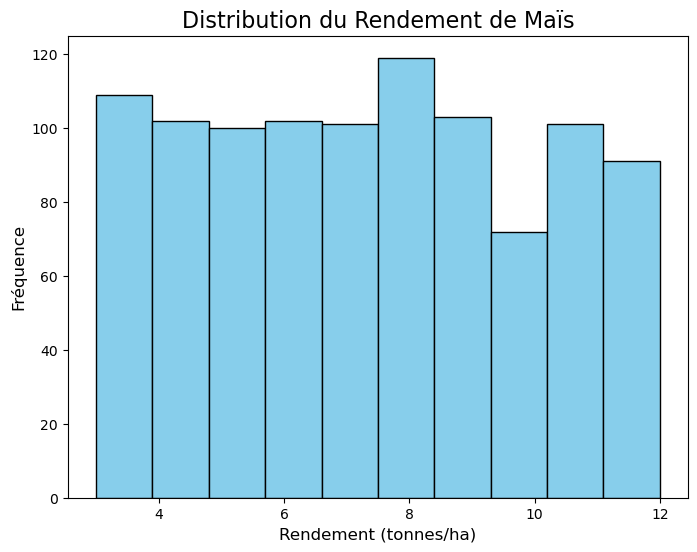

La distribution du rendement semble approximativement normale. Cela suggère que la plupart des rendements se situent autour de la moyenne, avec des valeurs plus extrêmes (très basses ou très hautes) moins fréquentes.Si la distribution était fortement asymétrique (étirée d'un côté), cela indiquerait que certains facteurs pourraient limiter (ou favoriser fortement) le rendement.


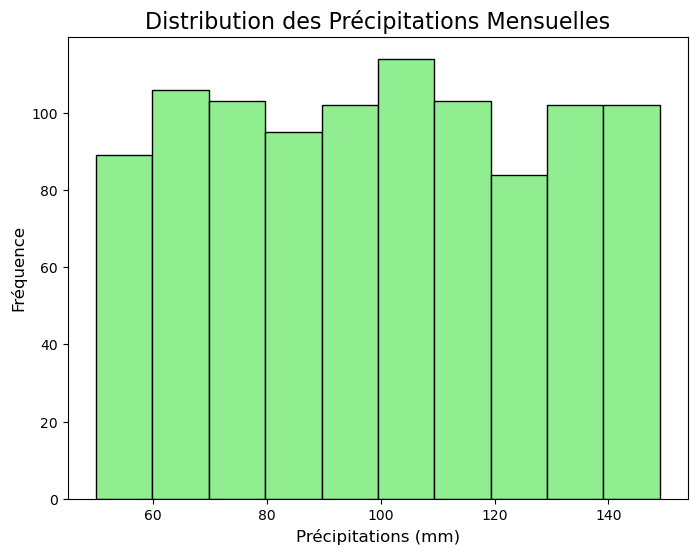

Cet histogramme montre une distribution assez uniforme ou légèrement asymétrique vers la droite. Cela indique que les précipitations sont relativement bien réparties sur la période observée, avec une légère tendance à avoir plus de jours avec des précipitations modérées.Une distribution bimodale (deux pics) pourrait indiquer deux régimes de précipitations distincts.


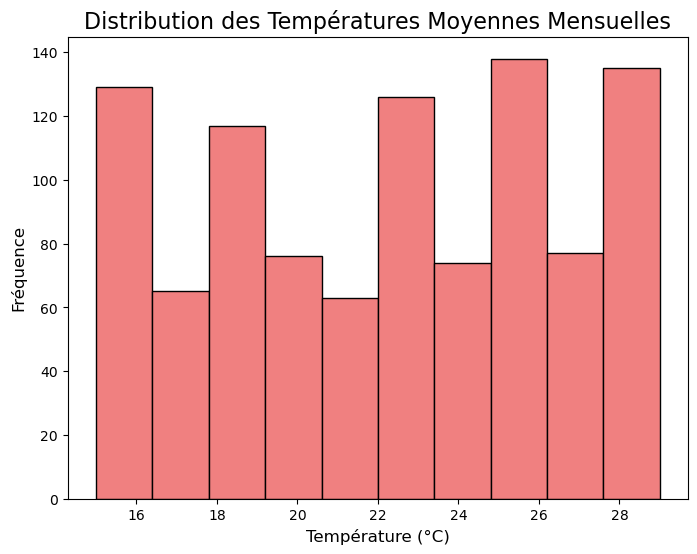

L'histogramme de la température présente également une distribution qui pourrait être considérée comme approximativement normale ou légèrement uniforme. Les températures semblent être regroupées autour d'une plage centrale.Des pics multiples pourraient indiquer des variations saisonnières ou des anomalies climatiques.


In [23]:
# Histogramme du rendement
plt.figure(figsize=(8, 6))
plt.hist(data[target_variable], color='skyblue', edgecolor='black')
plt.title('Distribution du Rendement de Maïs', fontsize=16)
plt.xlabel('Rendement (tonnes/ha)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

print("La distribution du rendement semble approximativement normale. Cela suggère que la plupart des rendements se situent autour de la moyenne, avec des valeurs plus extrêmes (très basses ou très hautes) moins fréquentes.Si la distribution était fortement asymétrique (étirée d'un côté), cela indiquerait que certains facteurs pourraient limiter (ou favoriser fortement) le rendement.")

# Histogramme des précipitations
plt.figure(figsize=(8, 6))
plt.hist(data['precipitations_mm'], color='lightgreen', edgecolor='black')
plt.title('Distribution des Précipitations Mensuelles', fontsize=16)
plt.xlabel('Précipitations (mm)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

print("Cet histogramme montre une distribution assez uniforme ou légèrement asymétrique vers la droite. Cela indique que les précipitations sont relativement bien réparties sur la période observée, avec une légère tendance à avoir plus de jours avec des précipitations modérées.Une distribution bimodale (deux pics) pourrait indiquer deux régimes de précipitations distincts.")

# Histogramme de la température
plt.figure(figsize=(8, 6))
plt.hist(data['temperature_c'], color='lightcoral', edgecolor='black')
plt.title('Distribution des Températures Moyennes Mensuelles', fontsize=16)
plt.xlabel('Température (°C)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

print("L'histogramme de la température présente également une distribution qui pourrait être considérée comme approximativement normale ou légèrement uniforme. Les températures semblent être regroupées autour d'une plage centrale.Des pics multiples pourraient indiquer des variations saisonnières ou des anomalies climatiques.")

Maintenant, voici les Boxplots pour identifiers les outliers

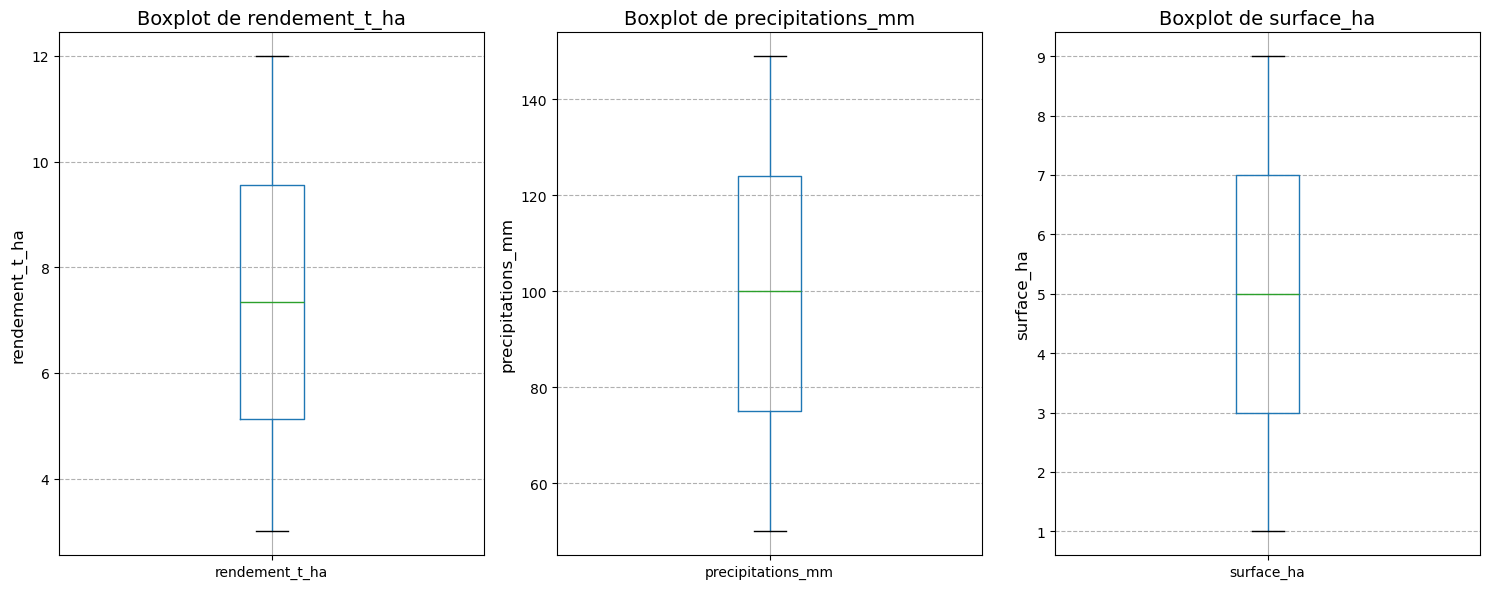

In [24]:
# Créer les boxplots
variables_to_plot = ['rendement_t_ha', 'precipitations_mm', 'surface_ha']

plt.figure(figsize=(15, 6))

for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(1, 3, i)  # 1 ligne, 3 colonnes, position i
    data.boxplot(column=variable)
    plt.title(f'Boxplot de {variable}', fontsize=14)
    plt.ylabel(variable, fontsize=12)
    plt.grid(axis='y', linestyle='--')

plt.tight_layout()  # Ajuste l'espacement pour éviter le chevauchement
plt.show()

Le boxplot du rendement révèle la variabilité de la production de maïs, avec des valeurs aberrantes indiquant des récoltes exceptionnellement bonnes ou mauvaises.
Le boxplot de la précipitation  montre la distribution des précipitations, permettant d'identifier les années avec des sécheresses ou des inondations potentielles.
Le boxplot de la surface illustre la répartition des tailles de parcelles cultivées, révélant la diversité des exploitations.

4. Voici la matrice de corrélation :

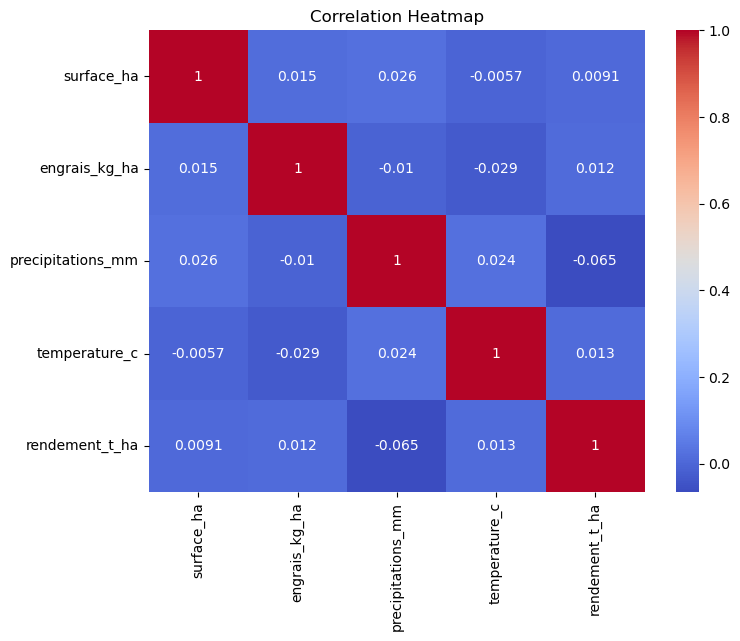

In [25]:
# Matrice de corrélation et heatmap
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Une corrélation de -1 à 0 signifie que si l'une variable va augmenter, l'autre aura tendance à diminuer
une corrélation de 0 à 1 signifie que si l'une variable va augmenter, l'autre aura tendance à augmenter.
Une corrélation à 1 signifie que les deux varibale évolue en même temps (en générale on a 1 entre deux variable identiques)



Exercice 3 : 

Soit h0 : " le sol n'a pas d'impact signficatif sur le rendement" et h1 : " le sol a un impact significatif sur le rendement"
utilisons l'outils ANOVA pour détéerminer quel hypothese nous allons garder : 

In [26]:
anova_result = f_oneway(
    data[data['type_sol'] == 'Argileux'][target_variable],
    data[data['type_sol'] == 'Sableux'][target_variable],
    data[data['type_sol'] == 'Limoneux'][target_variable]
)
print("P-value ANOVA :", anova_result.pvalue)

P-value ANOVA : 0.2581509831874908


La P Value est supérieur à 0,05. On en conclut que la sol n'a pas d'impact significatif sur le rendement, on accepte H0. Sur feuille, nous avions trouver l'inverse, liée au fait que nous avions travaillé sur 5 lignes de données, alors qu'ici, nous travaillon à un milleir de lignes, soit beaucoup plus de données.

Exercice 4

4.1. préparons les données d'entrainement et de test 

In [27]:
# Préparation des données pour le modèle
X = pd.get_dummies(data[explanatory_variables], columns=['type_sol'], drop_first=True)
y = data[target_variable]

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.2. et 4.3 Entrainement de models et évalutation

In [28]:
# a) Régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# b) Arbre de décision
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# c) Forêt aléatoire (Random Forest)
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)


def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print("--------------------")

# Évaluer chaque modèle
evaluate_model(linear_model, X_test, y_test, "Linear Regression")
evaluate_model(tree_model, X_test, y_test, "Decision Tree")
evaluate_model(forest_model, X_test, y_test, "Random Forest")

Model: Linear Regression
MAE: 2.0959
RMSE: 2.4621
R²: -0.0280
--------------------
Model: Decision Tree
MAE: 2.6812
RMSE: 3.3919
R²: -0.9510
--------------------
Model: Random Forest
MAE: 2.0621
RMSE: 2.4996
R²: -0.0595
--------------------


Régression Linéaire : Pas terrible. Elle fait des erreurs moyennes d'environ 2 tonnes/ha, mais elle n'explique presque rien de ce qui influence le rendement.

Arbre de Décision : Le pire de tous. Il fait de grosses erreurs et est complètement à côté de la plaque pour prédire le rendement.

Forêt Aléatoire : Le "moins pire". Il fait les erreurs les plus petites en moyenne, mais il reste mauvais pour expliquer ce qui influence le rendement.

pour conclure, les modèles ne sont pas bons pour prédire le rendement de maïs mais le moins pire est le random forest

Exercice 5


5.1


In [29]:
# Récupérer l'importance des variables
importances = forest_model.feature_importances_

# Afficher l'importance des variables
print(explanatory_variables)
print(importances)


['surface_ha', 'type_sol', 'engrais_kg_ha', 'precipitations_mm', 'temperature_c']
[0.15330184 0.31739863 0.28959613 0.17944367 0.03148171 0.02877802]


On comprends que la variable la plus importante est le type_sol, suivi de l'engrais, puis des précipitation, puis de la surfaces et enfin de la température

5.2 On peut proposer plusieurs axes d'améliorations en fonction des données que nous avons comme optimiser l'utilisation d'engrais en fonction du type de sol et des besoins de la culture, choisir le type de sol le plus adapté à la culture du maïs si possible, gérer efficacement l'irrigation en fonction des précipitations et des besoins en eau du maïs, adapter les pratiques culturales en fonction des conditions de température.

5.3 On peut dire poser comme limite de ce modèle est le peu de variable explicative, le peu de données, et la possible non linéarité des variables. plus de données, un meilleur modèle d'apprentissage et plus de variables explicatives pourrait améliorer les prédictions.

5.4 On pourrait proposer à la ferme d'investir des analyses de sol plus régulière, un suivi climatique, expérimenter différents types de maïs etc...